# Interactive Python 

In this course, we will use Python to carry out computation. In particular, it would be helpful to use Python interactively, trying things and learning by doing.

Interactive Python is made available by the IDE Spyder and by Jupyter. Spyder is a Python Integrated Development Environment (IDE) that is installed in the Linux machines of the IMADA Computer Lab. Just type `spyder` from command line. Unfortunately, I have not succeeded in installing Spyder under MacOsX. If you want to try you should use [Anacoda](https://www.continuum.io/), a widely-used Python platform that includes Spyder. It might work.

Jupyter provides a language-agnostic architecture for interactive computing. IPython is focused on Python providing a Python kernel for Jupyter. Jupyter notebook provides a python interface in the browser. The tutorial you are reading is a python notebook.

To install Jupyter follow the instructions at the [Jupyter page](http://jupyter.org/install.html). For example, you can use [Anacoda](https://www.continuum.io/). Anaconda provides also a broad set of Python modules, among which Gurobi, that we will use in the second part of the course. Anaconda isn't the only choice in Python distributions and/or IDEs. Popular alternatives include Canopy, Eric, iep, and PyDev. However, if you are a more experienced user you can also use `pip`. In the course you can use Python 2.7 or Python 3.6. Gurobi does not support Python 3.5 or Python 3.7. The behaviour of Python 3 can be approximated in Python 2.7 by importing the module `__future__`. For example:
```
from __future__ import division, print_function, unicode_literals
```

Jupyter can be used from the shell by calling a console that allows the inlining of plots and text highlighting by typing: 
```bash
jupyter qtconsole
```
or as notebook from a borwser started by typing 
```bash 
jupyter notebook
```
Notebook-style interfaces allow to mix executable code, text, and graphics and to create a self-documenting stream of results. Notebooks can be saved and continued later, which make them particularly well suited for prototyping and experimentation.

You can create a new notebook by clicking on the `New` icon (in the upper right) and choosing one of the Notebook options. Once your new notebook starts, you can type standard Python commands or Gurobi Interactive Shell commands directly into the `In` window. 


You can read documentation on ipython at these links:

* [IPython documentation](http://ipython.readthedocs.io/en/stable/)

* [Using IPython for interactive work](http://ipython.readthedocs.io/en/stable/interactive/index.html)

## Plotting 

Plotting in Python works with the [Matplotlib](http://matplotlib.org/) plotting library. 

Matplotlib integrates with IPython's display system and event loop handling.
<!-- (there is also a feature to load [Matplotlib examples](http://matplotlib.org/examples) %load URL_to_py eg: %load http://matplotlib.org/mpl_examples/style_sheets/plot_ggplot.py) -->
To make plots in IPython using Matplotlib, you must first enable IPython's matplotlib mode. To do this, run the `%matplotlib` command to enable plotting in a Notebook. This takes an optional argument that specifies which Matplotlib backend should be used. Most of the time, in the Notebook, you will want to use the inline backend, which will embed plots inside the Notebook:

In [1]:
%matplotlib inline

Functions with % are extra functions of IPython that add functionalities to the environment. They are called [*magic functions*](http://ipython.org/ipython-doc/dev/interactive/magics.html). Other useful magic function are %timeit to determine running time of a command and %run to run a script from a file. 
The command %matplotlib does not load the library in python. As usual we do:

In [2]:
import matplotlib.pyplot as plt

To work with Linear Algebra we will use the `numpy` module (or alternatively `scipy`). This module makes available a data type `array` which is suitable to carry out matrix operations.

In [3]:
import numpy as np

In IPython you can have access to the documentation of a function by typing '?' followed by the name of the module followed by the function: eg, `?np.polyd`

Let's plot the following polynomial of degree 3: 

$$P_3(x)=x^3-7x+6=(x-1)(x-2)(x+3)$$

We use the `numpy.poly1d` function to represent the polynomial. It takes an array of coefficients `a` of length $n+1$ such that the polynomial is described by:
```python
    a[0] * x**n + a[1] * x**(n-1) + ... + a[n-1]*x + a[n]
```
(Try `numpy.polyfit?` to know more). 

In [4]:
a=[1,0,-7,6]
P=np.poly1d(a)
print(P)

   3
1 x - 7 x + 6


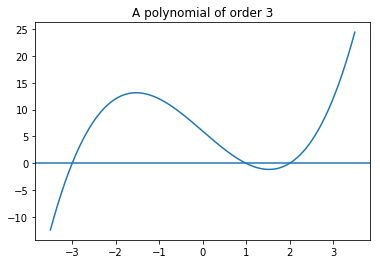

In [5]:
x = np.linspace(-3.5, 3.5, 500)
plt.plot(x, P(x), '-')
plt.axhline(y=0)
plt.title('A polynomial of order 3');

**Roots of a polynomial of degree n**

Let's $P_n(x)$ be a general polynomial of degree $n$:

$$P_n(x)=p_n+p_{n-1}x+p_{n-2}x^2+\cdots+p_0x^n$$

`numpy.roots(p)` Return the roots of a polynomial with coefficients given in `P`. For the polynomial of 3rd degree seen above: 

In [6]:
np.roots(P)

array([-3.,  2.,  1.])

## Arrays and Matrices
We shall use `np.array` to represent matrices and vectors. Although the native data type `list` could be used as well, there are some important differences in the operations that can be carried out among these data types. In particular, most matrix operations are not defined on `lists` and would need to be reimplemented while `np.array` have them already available. On the other hand, there is no append method with `np.array`. Let's see some examples:

In [7]:
b=np.array([1,2,3])
print(2*b)
print(b/2)
#np.norm(b)

[2 4 6]
[ 0.5  1.   1.5]


**Indexing and slices**  

Indices start at 0.

In [8]:
A=np.array([[1.,2,3],
            [4,5,6],
            [7,8,9]])
print("A: ", A)
print(A[0,0])
print(A[1:]) # all rows starting from the second
print(A[1]) # the second row of the matrix
print(A[:,2]) # a vector filled by the 3nd column of the matrix 
print("Type: ", A.dtype)
print("Dimension:", A.shape, A.ndim)

A:  [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]
1.0
[[ 4.  5.  6.]
 [ 7.  8.  9.]]
[ 4.  5.  6.]
[ 3.  6.  9.]
Type:  float64
Dimension: (3, 3) 2


In [9]:
A.reshape(1,9)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])

Caution: reshape is just a view on the array, it does not copy the data. Beware: the following do *shallow copy*:

In [10]:
N=A
N[0,0] = 0 # now A[0,0] = 1
M=A.reshape(1,9)
M[0,7]=10 # now A[2,1] is 10
A

array([[  0.,   2.,   3.],
       [  4.,   5.,   6.],
       [  7.,  10.,   9.]])

We can see the base object by:

In [11]:
print(A.base)
print(M.base) # the base object of M is the matrix A

None
[[  0.   2.   3.]
 [  4.   5.   6.]
 [  7.  10.   9.]]


To implement a *deep copy* you must use:

In [12]:
B=np.copy(A)
B

array([[  0.,   2.,   3.],
       [  4.,   5.,   6.],
       [  7.,  10.,   9.]])

Caution with casting:

In [13]:
B=A.astype('int')
A[0,0]=1.5
B[0,1]=2.5
print(A)
print(B)

[[  1.5   2.    3. ]
 [  4.    5.    6. ]
 [  7.   10.    9. ]]
[[ 0  2  3]
 [ 4  5  6]
 [ 7 10  9]]


In Jupyter it is possible from command line to ask for completion via
tab. This can also be used to explore which functions are available for
a given module. Try for example to type 
```
import numpy as np
np.
```
followed by a tab. You should see a list of available functions. Among
them there are two submodules that will be very useful for us:
`random` and `linalg`. The first implements function to
generate random numbers and matrices. The second implements functions
from linear algebra.

### Functions to construct arrays

The following is a list of functions to construct matrices and vectors.

In [14]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [15]:
np.ones((3,4))
np.identity(4)
np.diag([1,2,3,4])
np.random.rand(3,4)
np.random.randint(1,10,size=(3,4))

array([[5, 4, 9, 1],
       [6, 3, 4, 2],
       [3, 5, 4, 4]])

In [16]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [17]:
np.linspace(0,5,11)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

To concatenate arrays you have to use the concatenate function

In [18]:
np.concatenate([A,A],axis=1) # same as np.column_stack() and np.hstack()

array([[  1.5,   2. ,   3. ,   1.5,   2. ,   3. ],
       [  4. ,   5. ,   6. ,   4. ,   5. ,   6. ],
       [  7. ,  10. ,   9. ,   7. ,  10. ,   9. ]])

In [19]:
np.concatenate([A,A],axis=0) # same as np.row_stack() and np.vstack()

array([[  1.5,   2. ,   3. ],
       [  4. ,   5. ,   6. ],
       [  7. ,  10. ,   9. ],
       [  1.5,   2. ,   3. ],
       [  4. ,   5. ,   6. ],
       [  7. ,  10. ,   9. ]])

Note that `concatenate` works with arrays that are at least 2-dimensional. The methods: 
- `column_stack` and `hstack` to stack 1-D arrays as columns into a 2-D array and
- `row_stack` and `vstack` to stack arrays in sequence vertically (row wise)

work also with 1-dimensional arrays.

## Operations with arrays

The operations `+,*,/,-` are *elementwise*. For the operations of scalar multiplication and matrix multiplication the `dot` method must be used. Compare the following two cells:

In [20]:
b=np.array([1,2,3])
v=np.array([2,0,1])
b*v

array([2, 0, 3])

In [21]:
np.dot(b,v)

5

In [22]:
A*b

array([[  1.5,   4. ,   9. ],
       [  4. ,  10. ,  18. ],
       [  7. ,  20. ,  27. ]])

In [23]:
np.dot(A,b)

array([ 14.5,  32. ,  54. ])

In [24]:
A.T # Matrix transpose

array([[  1.5,   4. ,   7. ],
       [  2. ,   5. ,  10. ],
       [  3. ,   6. ,   9. ]])

Beware that like reshape, transpose does not copy the data. 
Vectors have one dimension hence transposing does not do anything particular. In this case it is more appropriate to use reshape:

In [25]:
b.reshape(-1,1) # yelds a column vector, -1 tells to guess the size

array([[1],
       [2],
       [3]])

Most mathematical functions act element-wise. They are also called universal functions.

In [26]:
np.cos(np.array([1,2,3]))

array([ 0.54030231, -0.41614684, -0.9899925 ])

In [27]:
2**np.arange(4) # arange includes the 0

array([1, 2, 4, 8])

In [28]:
np.arange(4)**np.arange(4)

array([ 1,  1,  4, 27])

Some functions do not act component-wise, eg, `min`, `max`, `sum`. These functions may operate on the whole matrix or column-wise or row-wise.

In [29]:
print(A)
np.sum(A) # on the whole matrix
np.sum(A,axis=1) # row-wise
np.sum(A,axis=0) # column-wise (this is also the result of `sum` from base python)

[[  1.5   2.    3. ]
 [  4.    5.    6. ]
 [  7.   10.    9. ]]


array([ 12.5,  17. ,  18. ])

If it is not, it is possible to make a function element-wise via `vectorize`. This yields often an improvement in performance with respect to for loops. Compare for example:

In [30]:
def f(x):
    return 0 if x<=5 else 1
# f(A) # error
np.vectorize(f)(A)

array([[0, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

#### Matrix inverse  

The inverse of a matrix can be calculated with a function from the set of linear algebra functions of numpy.  

In [31]:
np.linalg.det(A) # returns the determinant of A, $det(A) \neq 0$ if matrix invertible 
np.linalg.inv(A)

array([[-3.33333333,  2.66666667, -0.66666667],
       [ 1.33333333, -1.66666667,  0.66666667],
       [ 1.11111111, -0.22222222, -0.11111111]])

#### Plotting vectors

To plot vectors we can use [`matplotlib.pyplot.quiver`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver). In the basic form `quiver(X,Y,U,V)`, `X` and `Y` are the coordinates of the tail of the vector and U and V the components of the vector. The plot needs some tweak for the scales.

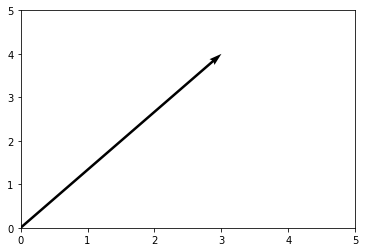

In [32]:
plt.quiver(0,0,3,4,scale=1,scale_units='xy',angles='xy')
plt.gca().set_xlim([0,5])
plt.gca().set_ylim([0,5]);

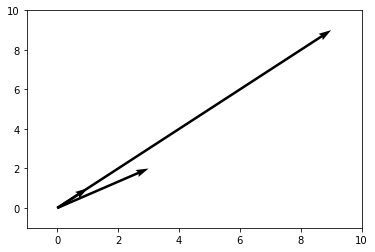

In [33]:
soa =np.array( [ [3,2], [1,1], [9,9]]) 
U,V = zip(*soa)
plt.quiver([0,0,0],[0,0,0],U,V,angles='xy',scale_units='xy',scale=1)
ax=plt.gca()
ax.set_xlim([-1,10])
ax.set_ylim([-1,10]);

## Solving a Linear System
If $A$ is a matrix and $\mathbf{b}$ is a vector, the system of linear equations $$A\mathbf{x}=\mathbf{b}$$ is solved using the `solve` method from `numpy.linalg` or `scipy.linalg` (the second being more efficient):

In [34]:
import scipy.linalg as sl
x=sl.solve(A, b)
x

array([ -1.11022302e-16,   7.77156117e-17,   3.33333333e-01])

In [35]:
np.allclose(np.dot(A, x), b)

True

## Easy printing for LaTex

In [36]:
def bmatrix(a):
    """Returns a LaTeX bmatrix
    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += [r'  ' + ' & '.join(l.split()) + '\\\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [37]:
A=np.random.randint(4,size=(2,2))
print(bmatrix(A)) 
print(bmatrix(A.T))

\begin{bmatrix}
  0 & 3\\
  2 & 1\\
\end{bmatrix}
\begin{bmatrix}
  0 & 2\\
  3 & 1\\
\end{bmatrix}


## Fraction Mode

It is possible to carry out operations in fraction mode using the module `fractions`. 

In [38]:
from fractions import Fraction as f
A = np.array([[f(1,1),f(2,1)],
              [f(3,1),f(4,1)]])
A[0] = f(1,3)*A[0]

Some pretty printing function, which translates fractions in strings:

In [39]:
def printm(a):
    """Prints the array as strings 
    :a: numpy array
    :returns: prints the array
    """
    def p(x):
        return str(x)
    p = np.vectorize(p,otypes=[str])
    print(p(a))

In [40]:
printm(A)

[['1/3' '2/3']
 ['3' '4']]
